We start by importing the necessary libraries

In [179]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime

We store the path of the datafile in a varible called url. 
Then we use pandas to create a dataframe for the csv-file

In [180]:
url = "C:/Users/henri/Downloads/flight.csv"
df = pd.read_csv(url)

In the next block we wil have to use panda to convert string to datetime.
This makes it possible to perform mathematical operations wich is necessary when we are calcultaing air time and delay. 

In [181]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'], errors='coerce') 
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce')


Now we wil create two new columns. One for air time and one for daly.
Air time is calculted by subtracting departure time from arrival time.
delay is calculated by subtracting scheduled from arrival time

In [182]:
df['air_time'] = df["arr_time"]-df["dep_time"]
df['delay'] = df["arr_time"]-df["sched_arr_time"]

We wil also create a column for the time dealy in the form of a percentage

In [184]:
df["percent_delay"] = (100 * df['delay'])/df['air_time']

The code beneath print the 10 first rows of the dataframe 

In [191]:
df.head(10)

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944
5,5,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 07:53:00,2013-01-01 07:45:00,301,LGA,ORD,0 days 01:55:00,0 days 00:08:00,6.956522
6,6,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 09:24:00,2013-01-01 09:17:00,194,JFK,LAX,0 days 03:26:00,0 days 00:07:00,3.398058
7,7,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 09:23:00,2013-01-01 09:37:00,1124,EWR,SFO,0 days 03:25:00,-1 days +23:46:00,-6.829268
8,8,2013-01-01 05:59:00,2013-01-01 05:59:00,2013-01-01 07:02:00,2013-01-01 07:06:00,1806,JFK,BOS,0 days 01:03:00,-1 days +23:56:00,-6.349206
9,9,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 08:51:00,2013-01-01 08:58:00,371,LGA,FLL,0 days 02:51:00,-1 days +23:53:00,-4.093567


Now we wil display statistics from the percent-delay column.
(Negative delay means the plane arravide sooner then scheduled).

In [186]:
df["percent_delay"].describe()

count    121373.000000
mean          3.436342
std          82.480385
min       -2763.265306
25%         -13.725490
50%          -3.960396
75%           7.339450
max        2879.591837
Name: percent_delay, dtype: float64

The next line of code wil display a boxplot from the statistics

<Axes: >

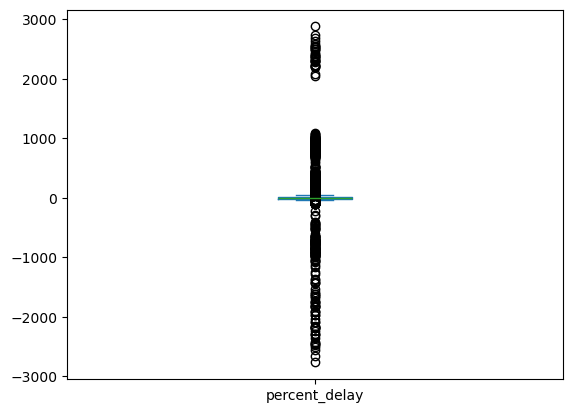

In [187]:
df["percent_delay"].plot.box()

For making the data in percent-daly column less sredd, we wil remove the most extreme values. 
This is first done by creating a functions wich removes the top and bottom 5% values. 

In [188]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

Then we applay the function to the percent-delay column.

In [189]:
df["percent_delay"] = remove_outlier(df["percent_delay"])

Bellow is the code displaying the filterd statistics from percent-delay column

In [190]:
df["percent_delay"].describe()

count    109215.000000
mean         -1.430966
std          17.385088
min         -32.758621
25%         -12.587413
50%          -3.954802
75%           5.660377
max          70.108696
Name: percent_delay, dtype: float64